**Exercise**: In a ring lattice, every node has the same number of neighbors. The number of neighbors is called the degree of the node, and a graph where all nodes have the same degree is called a regular graph.

All ring lattices are regular, but not all regular graphs are ring lattices. In particular, if k is odd, we can't construct a ring lattice, but we might be able to construct a regular graph.

Write a function called `make_regular_graph` that takes `n` and `k` and returns a regular graph that contains `n` nodes, where every node has `k` neighbors. If it's not possible to make a regular graph with the given values of `n` and `k`, the function should raise a ValueError.

In [1]:
import networkx as nx
import numpy as np
import seaborn as sns
import math as m

# set node colors
colors = sns.color_palette('pastel', 8)
sns.set_palette(colors)

C:\Users\Carlo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


This is the original implementation of the `adjacent_edges` function to get the edges for a ring lattice which takes the `nodes` and `halfk` as inputs:

In [2]:
def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u,v

Here is a test for `adjacent_edges` using even number of nodes and even neighbors:

In [3]:
nodes = range(8)
list(adjacent_edges(nodes, 4))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 0),
 (5, 6),
 (5, 7),
 (5, 0),
 (5, 1),
 (6, 7),
 (6, 0),
 (6, 1),
 (6, 2),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3)]

I have modified `adjacent_edges` to `regular_edges` that takes the list of nodes and the number of neighbors `k` to give the edges for a regular graph with even or odd neighbors for each node. 

In [4]:
def regular_edges(nodes, k):
    n = len(nodes)
    ed = [] # list placeholder for edges
    for i, u in enumerate(nodes):
        ne = m.floor(k/2) #floor function similar to adjacent_edges
        for j in range(i+1, i+ne+1):
            v = nodes[j % n]
            ed.append((u, v))
        if (k % 2) and i < n/2: # conditional to check if there are odd neighbors
            ed.append((u, int(i+n/2)))
    if len(ed) != 0.5*n*k: # conditional to check if the number of edges satisfy for a regular graph
        raise ValueError("No regular graph can be formed!")
    return ed

Here is a check for `regular_edges` using odd `k`:

In [5]:
nodes = range(5)
neighbors = 4                   
list(regular_edges(nodes, neighbors))  

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (2, 4),
 (3, 4),
 (3, 0),
 (4, 0),
 (4, 1)]

Here is the `make_regular_graph` function that creates a regular graph given the number of nodes and the number of neighbors per node. It gives a `Value Error` when the given `n` and `k` values cannot create a regular graph.

In [6]:
def make_regular_graph(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    edges = regular_edges(nodes,k)
    G.add_edges_from(edges)
    return G

C:\Users\Carlo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


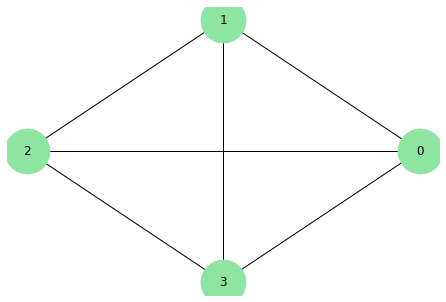

In [7]:
nodes = 4
neighbors = 3
reg_graph = make_regular_graph(nodes, neighbors)
nx.draw_circular(reg_graph,
                node_color = 'C2',
                node_size = 2000,
                with_labels = True)